In [1]:
%load_ext autoreload
%autoreload 2

In [196]:
from Ge_calculation import GAP, MD_run
import matplotlib.pyplot as plt
from ase.io.cfg import read_cfg
from ase.io.extxyz import write_extxyz
from ase.neighborlist import neighbor_list
import numpy as np
import re
from sys import argv
import os
from ase import build, Atoms
from quippy.potential import Potential
from Ge_analysis import *
from ase.io.proteindatabank import read_proteindatabank, write_proteindatabank
from ase.io.lammpsdata import write_lammps_data
from ase.neighborlist import neighbor_list
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
from glob import glob
import sys
from ase import build
from ase.io import Trajectory
from ase.io import read
from ase.eos import EquationOfState
from ase.visualize import view
from copy import deepcopy
from ase.io.castep import read_castep_castep, read_param
from ase.calculators.castep import Castep
from ase.io import read
from ase.io.extxyz import read_xyz
import pandas as pd
from ase.lattice import hexagonal, tetragonal, orthorhombic
from ase.constraints import StrainFilter, UnitCellFilter
from ase.optimize import BFGS
import contextlib
import io
import sys
import pymatgen.ext.matproj as mp
import pymatgen.core.periodic_table as pt
import pymatgen.io.ase as pase

In [3]:
GE = '/Users/Moji/Documents/Summer20/Ge/'
os.chdir('/Users/Moji/Documents/Summer20/Ge/')
pot_dir ='/Users/Moji/Documents/Summer20/Ge/Potentials/rescaling/'

In [29]:
resc_amo = GAP(train_file= pot_dir + 'resc_amorphs_train.xyz', val_file=pot_dir + 'resc_amorphs_validate.xyz',
               pot=pot_dir + 'resc_amorphs_as5_ds002_vT.xml')

Training set structure count: 193
Validation set structure count: 48
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['amorph', 'hiT_amorph', 'liq_rescale_120', 'liq_rescale_80']


['amorph', 'hiT_amorph', 'liq_rescale_120', 'liq_rescale_80']

In [30]:
resc_amo.calc()
resc_amo.analyse()
resc_amo.save('/Users/Moji/Documents/Summer20/Ge/Pickles/resc_amo')

Config amorph done
Config hiT_amorph done
Config liq_rescale_120 done
Config liq_rescale_80 done
Config amorph done
Config hiT_amorph done
Config liq_rescale_120 done
Config liq_rescale_80 done
--- 340.26622700691223 seconds ---


In [4]:
resc_orig = GAP(train_file= pot_dir + 'resc_orig_train.xyz', val_file=pot_dir + 'resc_orig_validate.xyz',
                               pot=pot_dir + 'resc_orig_as5_ds002_vT.xml',
                sorted_order=[0,3,4,1,2,6,5])
resc_orig.config_labels

Training set structure count: 361
Validation set structure count: 90
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['amorph', 'liq', 'hiT_liq', 'hiT_amorph', 'inter', 'liq_rescale_120', 'liq_rescale_80']
New order:  ['amorph', 'hiT_amorph', 'inter', 'liq', 'hiT_liq', 'liq_rescale_80', 'liq_rescale_120']


['amorph',
 'hiT_amorph',
 'inter',
 'liq',
 'hiT_liq',
 'liq_rescale_80',
 'liq_rescale_120']

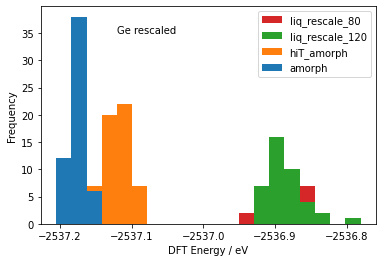

In [173]:
fig, axs = plt.subplots()

axs.hist(resc_amo.data_dict['QM_E_t'], label=resc_amo.config_labels, bins=20,
         histtype='stepfilled')
axs.text(-2537.12, 35, 'Ge rescaled')
axs.set(xlabel='DFT Energy / eV', ylabel='Frequency')
axs.legend()

In [127]:
resc_amo_vs = [[np.trace(i)/3 for i in j] for j in resc_amo.data_dict['QM_V_t']]

In [115]:
resc_orig_vs = [np.array([np.trace(i)/(3*resc_orig.T_configs[ct][ct2].get_volume()) for ct2,i in enumerate(j)])
                for ct,j in enumerate(resc_orig.data_dict['QM_V_t'])]





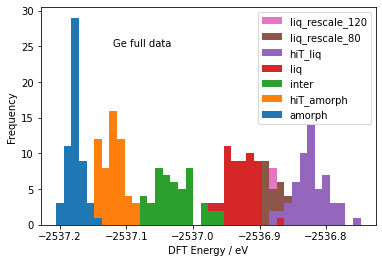

In [79]:
fig, axs = plt.subplots()

axs.hist(resc_orig.data_dict['QM_E_t'], label=resc_orig.config_labels, bins=40,
         histtype='stepfilled')
axs.text(-2537.12, 25, 'Ge full data')
axs.set(xlabel='DFT Energy / eV', ylabel='Frequency')
axs.legend()
fig.savefig(GE+'Analysis/Ge_orig_E.png')

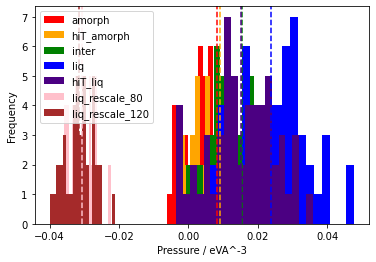

In [116]:
colors=['r','Orange','g','b','Indigo','Pink', 'Brown']
fig, axs = plt.subplots()
for i in range(7):
    axs.hist(resc_orig_vs[i], label=resc_orig.config_labels[i], bins=20,
             histtype='stepfilled', color=colors[i])
    axs.axvline(resc_orig_vs[i].mean(), linestyle='dashed', color=colors[i])
#axs.text(-40, 9, 'resc_orig MD-trained')
axs.set(xlabel='Pressure / eVA^-3', ylabel='Frequency')
axs.legend()
fig.savefig(GE+'Analysis/Ge_pressure.png')

In [5]:
si_pot = '/Users/Moji/Documents/Summer20/Ge/Potentials/Si_MDGAP_val/'
Si = GAP(train_file=si_pot+'train.xyz', val_file=si_pot+'validate.xyz', pot=si_pot+'Si_as5_ds002_vT.xml',
         sorted_order=[0, 2, 1, 3, 4])

Training set structure count: 201
Validation set structure count: 50
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['amorph', 'inter', 'hiT_amorph', 'liq', 'hiT_liq']
New order:  ['amorph', 'hiT_amorph', 'inter', 'liq', 'hiT_liq']


In [27]:
Si.calc()
Si.analyse()

Config amorph done
Config hiT_amorph done
Config inter done
Config liq done
Config hiT_liq done
Config amorph done
Config hiT_amorph done
Config inter done
Config liq done
Config hiT_liq done
--- 244.09408283233643 seconds ---


In [ ]:
Si.save('/Users/Moji/Documents/Summer20/Ge/Pickles/Si')

In [12]:
Si.load('/Users/Moji/Documents/Summer20/Ge/Pickles/Si')

Load successful
data_dict:  dict_keys(['QM_E_t', 'QM_F_t', 'QM_V_t', 'GAP_E_t', 'GAP_F_t', 'GAP_V_t', 'E_err_t', 'F_err_t', 'V_err_t', 'E_rmse_t', 'F_rmse_t', 'V_rmse_t', 'QM_E_v', 'QM_F_v', 'QM_V_v', 'GAP_E_v', 'GAP_F_v', 'GAP_V_v', 'E_err_v', 'F_err_v', 'V_err_v', 'E_rmse_v', 'F_rmse_v', 'V_rmse_v'])


In [ ]:
fig, axs = plt.subplots()

axs.hist(resc_orig.data_dict['QM_E_t'], label=resc_orig.config_labels, bins=40,
         histtype='stepfilled')
axs.text(-2537.12, 25, 'Ge full data')
axs.set(xlabel='DFT Energy / eV', ylabel='Frequency')
axs.legend()
fig.savefig(GE+'Analysis/Ge_orig_E.png')

In [ ]:
colors=['r','Orange','g','b','Indigo','Pink', 'Brown']
fig, axs = plt.subplots()
for i in range(7):
    axs.hist(resc_orig_vs[i], label=resc_orig.config_labels[i], bins=20,
             histtype='stepfilled', color=colors[i])
    axs.axvline(resc_orig_vs[i].mean(), linestyle='dashed', color=colors[i])
#axs.text(-40, 9, 'resc_orig MD-trained')
axs.set(xlabel='Pressure / eVA^-3', ylabel='Frequency')
axs.legend()
fig.savefig(GE+'Analysis/Ge_pressure.png')

In [ ]:
Si_vs = [[np.trace(i)/(3*Si.T_configs[ct][ct2].get_volume()) for ct2,i in enumerate(j)]
                for ct,j in enumerate(Si.data_dict['QM_V_t'])]
Si_vs = np.array(Si_vs)


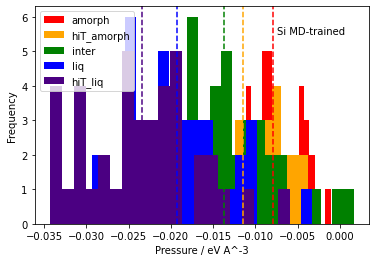

In [225]:
colors=['r','Orange','g','b','Indigo']
fig, axs = plt.subplots()
for i in range(5):
    axs.hist(Si_vs[i], label=Si.config_labels[i], bins=20,
             histtype='stepfilled', color=colors[i])
    axs.axvline(Si_vs[i].mean(), linestyle='dashed', color=colors[i])
#axs.text(-40, 9, 'Si MD-trained')
axs.set(xlabel='Pressure / eV A^-3', ylabel='Frequency')
axs.text(-0.0075, 5.5, 'Si MD-trained')
axs.legend()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/Si_pressure.png', bbox_inches='tight')

In [33]:
resc_orig_MD = MD_run('/Users/Moji/Documents/Summer20/Ge/MD_runs/rescaling/resc_orig_as5_ds002_vT/run_64001')

In [37]:
Si_MD = MD_run('/Users/Moji/Documents/Summer20/Ge/MD_runs/Si_liquid_gen/as5_ds002_vT/run_64001/')

In [40]:
Si_MD.configs[-1].set_atomic_numbers(64*[14])

In [106]:
tmp = resc_amo_MD.structure_factors(selection=([i for i in range(30,100)]+[220]),
                              #rings_dir='/Users/Moji/Documents/Summer20/Ge/MD_runs/Si_liquid_gen/rings',
                                    read_only=False)

R.I.N.G.S ran successfully


In [221]:
tmp = Si_MD.structure_factors(selection=([i for i in range(30,100)]+[220]),
                              rings_dir='MD_runs/Si_liquid_gen/rings',
                              read_only=True)

R.I.N.G.S ran successfully


In [224]:
#resc_amo_MD.bin_fit(s_selection=range(0,-1,1), q_selection=[1,12], nbins=200)
Si_MD.bin_fit(s_selection=[-1], q_selection=[1,12], nbins=200)

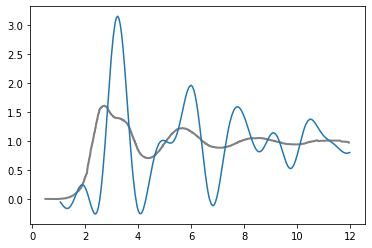

In [225]:
fig, axs = plt.subplots()
axs.errorbar(*Si_MD.Sq_x_av, yerr=None)
axs.plot(Si_exp_Sq[0], Si_exp_Sq[1]-0.5, color='Gray', linewidth=2)

In [47]:
Si_exp_Sq = np.genfromtxt('/Users/Moji/Documents/paper_data/Si_Sq_exp_Waseda1974.txt', delimiter=', ').T
Si_exp_Sq[1] += -0.5

In [134]:
Si_lit_db = GAP('/Users/Moji/Documents/Summer20/Ge/Structure_databases/gp_iter6_sparse9k.xml.xyz',
                parameter_names=['dft_energy', 'dft_force', 'dft_virial'])

Training set structure count: 2442
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['sh', 'dia', 'bt', 'liq', 'amorph', 'surface_001', 'surface_110', 'surface_111', 'surface_111_pandey', 'crack_110_1-10', 'crack_111_1-10', 'sp', 'sp2', 'interstitial', 'screw_disloc', 'divacancy', 'vacancy', '111adatom', 'surface_111_3x3_das', 'decohesion', 'bc8', 'bcc', 'fcc', 'hcp', 'hex_diamond', 'st12']


In [135]:
Si_lit_db.save('/Users/Moji/Documents/Summer20/Ge/Pickles/Si_lit_db')


In [163]:
Si_lit_vs = [[np.trace(i)/3 for i in j if not i is None] for ct,j in enumerate(Si_lit_db.data_dict['QM_V_t'])
             if Si_lit_db.config_labels[ct] in ['liq']]

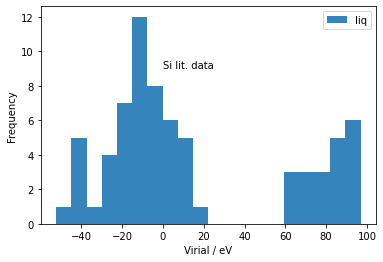

In [191]:
fig, axs = plt.subplots()

axs.hist(Si_lit_vs, label=Si_lit_db.config_labels[3], bins=20,
         histtype='stepfilled', alpha=0.9)
axs.text(0, 9, 'Si lit. data')
axs.set(xlabel='Virial / eV', ylabel='Frequency')
axs.legend(loc='upper right')

In [82]:
Si_hp_MD_1 = MD_run(GE+'MD_runs/Si_hp_liquid/run_1')

In [83]:
for i in Si_hp_MD_1.configs:
    i.set_atomic_numbers([32]*64)

In [77]:
Si_hp_MD_1.timesteps.index(120000)

120

In [6]:
Si_pot = Potential(param_filename=GE+'Potentials/Si_MDGAP_val/Si_as5_ds002_vT.xml', name='liq_amo')
Si_hcp = Potential(param_filename=GE+'Potentials/crystals/Si/hcp/Si_as5_ds002_vT_hcp.xml')
Si_hp_64 = Potential(param_filename=GE+'Potentials/crystals/Si/hp_64/Si_hp_64_as5_ds002_vT.xml')
pot = Potential(param_filename=GE+'Potentials/parameter_explore/as5_ds002_vT.xml')
pot_hp_orig = Potential(param_filename=GE+'Potentials/crystals/hp_orig/hp_orig_as5_ds002_vT.xml')
pot_hp_64 = Potential(param_filename=GE+'Potentials/crystals/hp_64/hp_64_as5_ds002_vT.xml')
pot_hp_64_sup30 = Potential(param_filename=GE+'Potentials/crystals/hp_64_sup30/hp_64_sup30_as5_ds002_vT.xml')
pot_hp_sup30_orig = Potential(param_filename=GE+'Potentials/crystals/hp_sup30_orig/hp_sup30_orig_as5_ds002_vT.xml')
pot_hpliq_64 = Potential(param_filename=GE+'Potentials/hp_liquid/hpliq_64/hpliq_64_as5_ds002_vT.xml')
pot_hpliq_amoliq = Potential(param_filename=GE+'Potentials/hp_liquid/hpliq_amoliq/hpliq_amoliq_as5_ds002_vT.xml')
pot_hpliq_full = Potential(param_filename=GE+'Potentials/hp_liquid/hpliq_full/hpliq_full_as5_ds002_vT.xml')
#pot = Potential(param_filename='/Users/Moji/Documents/Summer20/Ge/Potentials/Si_MDGAP_val/Si_as5_ds002_vT.xml')

In [70]:
Ge_pots = [pot, pot_hp_orig, pot_hp_64, pot_hp_64_sup30, pot_hp_sup30_orig,
           pot_hpliq_64, pot_hpliq_amoliq, pot_hpliq_full]
Ge_pot_labels = ['0P GAP', 'hp_all', 'hp_64', 'hp_64_sup30', 'hp_sup30_orig',
           'hpGAP_64', 'hpGAP_amoliq', 'hpGAP_full']
for i,val in enumerate(Ge_pots):
    val.name = Ge_pot_labels[i]
Si_pots = [Si_pot, Si_hcp, Si_hp_64]
Si_pot_labels = ['liq_amo_64', 'Si_hcp', 'Si_hp_64']
for i,val in enumerate(Si_pots):
    val.name = Si_pot_labels[i]

In [8]:
os.chdir('/Users/Moji/Documents/Summer20/Ge/Analysis/crysts')

In [ ]:
with mp.MPRester() as m:
    results_master = m.query(criteria={"pretty_formula":'Si'},
                             properties=["exp.tags", "icsd_ids", "task_id", "density", "final_structure"])


In [132]:
class CrystTest:
    
    def __init__(self, pots, element, extra_configs=[], extra_labels=[], n=10, opt=True, silent=False):
        '''pots: list of potentials
        element: element used for the pots (needs updating for multicomponent systems
        extra_configs/labels for the non-supported crystal structures (see add_config method)
        n: number of V points calculated per crystal structure
        opt: bool, optimize the crystal structures? Need to implement separate opt for
        each pot if desired
        silent: bool, silence output'''
        if not isinstance(pots, list):
            self.pots = [pots]
        else:
            self.pots = pots

        structs = [build.bulk(element, crystalstructure='fcc', a=3.0, cubic=True),
                   build.bulk(element, crystalstructure='diamond', a=3.0,  cubic=True),
                   build.bulk(element, crystalstructure='hcp', a=3, c=5),
                   build.bulk(element, crystalstructure='bcc', a=3.0, cubic=True),
                   build.bulk(element, crystalstructure='sc', a=3.0),
                   Atoms(hexagonal.Hexagonal(symbol=element, latticeconstant={'a':3.0, 'c':3.0}))] +\
                   Atoms(tetragonal.CenteredTetragonal(symbol=element, latticeconstant={'a'}))
            [deepcopy(i) for i in extra_configs]

        labels = ['fcc', 'dia', 'hcp', 'bcc', 'sc', 'sh'] + extra_labels

        cells = [[] for i in range(len(pots))]
        E = [[[] for j in range(len(structs))] for i in range(len(pots))]
        V = [[] for j in range(len(structs))]
        for j, p in enumerate(self.pots):
            for ct, val in enumerate(structs):
                if opt and ct < 6:
                    val.set_calculator(p)
                    sf = StrainFilter(val)
                    opt = BFGS(sf, logfile='dump')
                    opt.run(0.005)
                    val.set_calculator(None)
                cells[j].append(val.get_cell())
        if not silent:
            print('opts done')

        for j, p in enumerate(self.pots):
            for ct, val in enumerate(structs):
                for i in np.linspace(0.95, 1.05, n):
                    val.set_cell(i*cells[j][ct])
                    val.set_calculator(p)
                    E[j][ct].append(val.get_potential_energy()/len(val))
                    if j == 0:
                        V[ct].append(val.get_volume()/len(val))
            if not silent:
                print('pot {0} done'.format(p.name))

        dat = {'Structure':structs, 'Volumes':V}
        for i, val in enumerate(self.pots):
            dat.update({val.name:E[i]})
        self.df = pd.DataFrame(dat, index=labels)

    def add_config(self, config, label, opt=False, n=10):

        config = deepcopy(config)
        if opt:
            config.set_calculator(self.pots[0])
            uf = UnitCellFilter(config)
            opt = BFGS(uf, logfile='dump')
            opt.run(0.005)
            config.set_calculator(None)
        cell = config.get_cell()

        E = [[] for i in self.pots]; V = []
        for j, p in enumerate(self.pots):
            for i in np.linspace(0.95, 1.05, n):
                config.set_cell(i*cell)
                config.set_calculator(p)
                E[j].append(config.get_potential_energy()/len(config))
                if j == 0:
                    V.append(config.get_volume()/len(config))
            print('pot {0} done'.format(p.name))

        dat = {'Structure':[config], 'Volumes':[V]}
        for i, val in enumerate(self.pots):
            dat.update({val.name:[E[i]]})
        tdf = pd.DataFrame(dat, index=[label])
        self.df = self.df.append(tdf)

    def calc_HP(self, ps, pf, pn):
        p = np.linspace(ps, pf, pn)
        pea = p*0.05/8
        v = [[np.zeros(pn) for i in range(len(self.df))] for j in range(len(self.pots))]
        H = [[np.zeros(pn) for i in range(len(self.df))] for j in range(len(self.pots))]
        for j, pot in enumerate(self.pots):
            for ct, val in enumerate(self.df['Structure'][:6]):
                val.set_calculator(pot)
                for i in range(len(p)):
                    uf = UnitCellFilter(val, scalar_pressure=pea[i], hydrostatic_strain=True)
                    #uf = StrainFilter(val, scalar_pressure=pea[i], hydrostatic_strain=True)
                    opt = BFGS(uf, logfile='/dev/null')
                    opt.run(0.05)
                    v[j][ct][i] = (vt := val.get_volume()/len(val))
                    H[j][ct][i] = val.get_potential_energy()/len(val) + pea[i]*vt

            print('pot {0} done'.format(pot.name))
            self.df['H(P) {}'.format(pot.name)] = H[j]
        self.df['P'] = [p for i in range(len(self.df))]

        return

    def add_pot(self):
        return

    def plot_EV(self):
        return

In [111]:
len(df)



8

In [86]:
H = []
V = []
p = np.linspace(0,100,20)
sh_test = Atoms(hexagonal.Hexagonal(symbol='Ge', latticeconstant={'a':3.0, 'c':3.0}))
sh_test.calc = pot_hpliq_64
for i in p:
    uf = UnitCellFilter(sh_test, scalar_pressure=0.05/8 * i)
    relax = BFGS(uf, logfile='dump')
    relax.run(fmax=0.05)
    V.append(sh_test.get_volume())
    H.append(sh_test.get_potential_energy()/len(sh_test) + i*V[-1])

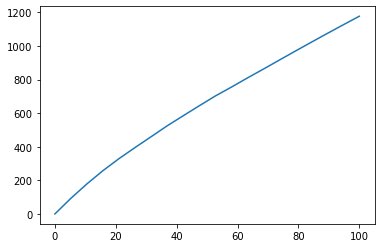

In [89]:
fig, axs = plt.subplots()
axs.plot(p, H-H[0])


In [85]:
Ge_cryst = CrystTest(Ge_pots, 'Ge',
                   extra_configs=[resc_orig.T_configs[0][-33], resc_orig.T_configs[3][-3],
                                  resc_orig.T_configs[-1][-3], resc_orig_MD.configs[-3],
                                Si_hp_MD_1.configs[120], Si_hp_MD_1.configs[-1]],
                   extra_labels=['amorph', 'liquid', 'liquid_resc', 'bad quench'])

opts done
struct 11: Atoms(symbols='Ge64', pbc=True, cell=[10.214715000000002, 10.214715000000002, 10.214715000000002], forces=..., masses=..., calculator=Potential(...)) done
struct 11: Atoms(symbols='Ge64', pbc=True, cell=[10.214715000000002, 10.214715000000002, 10.214715000000002], forces=..., masses=..., calculator=Potential(...)) done
struct 11: Atoms(symbols='Ge64', pbc=True, cell=[10.214715000000002, 10.214715000000002, 10.214715000000002], forces=..., masses=..., calculator=Potential(...)) done
struct 11: Atoms(symbols='Ge64', pbc=True, cell=[10.214715000000002, 10.214715000000002, 10.214715000000002], forces=..., masses=..., calculator=Potential(...)) done
struct 11: Atoms(symbols='Ge64', pbc=True, cell=[10.214715000000002, 10.214715000000002, 10.214715000000002], forces=..., masses=..., calculator=Potential(...)) done


In [134]:
#Ge_cryst = CrystTest([Ge_pots[0]]+Ge_pots[4:], 'Ge')
Ge_cryst = CrystTest([Ge_pots[0]]+[Ge_pots[5]], 'Ge')


opts done
pot 0P GAP done
pot hpGAP_64 done


In [96]:
Ge_cryst.add_config(resc_orig.T_configs[0][0], 'amorph')
Ge_cryst.add_config(resc_orig.T_configs[3][0], 'liq')

pot 0P GAP done
pot hp_sup30_orig done
pot hpGAP_64 done
pot hpGAP_amoliq done
pot hpGAP_full done
pot 0P GAP done
pot hp_sup30_orig done
pot hpGAP_64 done
pot hpGAP_amoliq done
pot hpGAP_full done


In [135]:
Ge_cryst.calc_HP(0, 20, 20)

pot 0P GAP done
pot hpGAP_64 done


In [65]:
resc_orig.config_labels

['amorph',
 'hiT_amorph',
 'inter',
 'liq',
 'hiT_liq',
 'liq_rescale_80',
 'liq_rescale_120']

In [56]:
Si_Es, Si_V = cryst_test(Si_pots, 'Si',
                                 extra_configs=[Si.T_configs[0][-2], Si.T_configs[-1][-2], Si_MD.configs[-1]],
                                 extra_labels=['amorph', 'liquid'])

opts done
struct 0: Atoms(symbols='Si4', pbc=True, cell=[[3.721113315557659, -1.806996737217177e-13, -3.0241527819214894e-13], [-1.806996737217177e-13, 3.721113315573493, 1.7776161074321419e-12], [-3.0241527819214894e-13, 1.7776161074321419e-12, 3.7211133155698843]], forces=..., calculator=Potential(...)) done
struct 1: Atoms(symbols='Si8', pbc=True, cell=[[5.60723058556379, 2.68926645255587e-12, 2.5317936687968774e-12], [2.68926645255587e-12, 5.607230470232286, 6.606155904516682e-13], [2.5317936687968774e-12, 6.606155904516682e-13, 5.607230852224224]], forces=..., calculator=Potential(...)) done
struct 2: Atoms(symbols='Si2', pbc=True, cell=[[2.5723460557389672, -1.5488081934116721e-12, -9.51511012215008e-13], [-1.2861730278708248, 2.2277170315904646, 2.3933723049121737e-12], [-1.5858516870250135e-12, 3.690455249974748e-12, 3.8490772502586887]], forces=..., calculator=Potential(...)) done
struct 3: Atoms(symbols='Si2', pbc=True, cell=[[2.720802517502681, -3.285794866574306e-17, -7.785

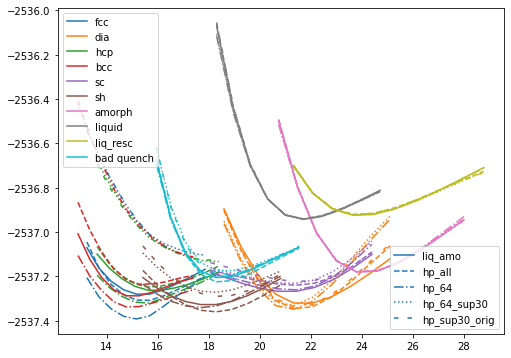

In [78]:
labels = ['fcc', 'dia', 'hcp', 'bcc', 'sc', 'sh']\
         + ['amorph', 'liquid', 'liq_resc', 'bad quench']
styl_list=['-','--','-.',':', (0, (3,6,3,6,3,10))]
fig, axs = plt.subplots(figsize=(8,6))
for i in range(len(Ge_cryst.df)):
    if i in []:
        continue
    line, = axs.plot(V[i], Es[0][i], label=labels[i])
    if i == 0:
        hands = [line]
    for j in range(len(Es[1:])):
        tmp, = axs.plot(V[i], Es[j+1][i], linestyle=styl_list[j+1], color=line.get_color())
        if i == 0:
            hands.append(tmp)
l1 = axs.legend(loc='upper left')
axs.legend()
l2 = axs.legend(hands, Ge_pot_labels, loc='lower right')
axs.add_artist(l1)

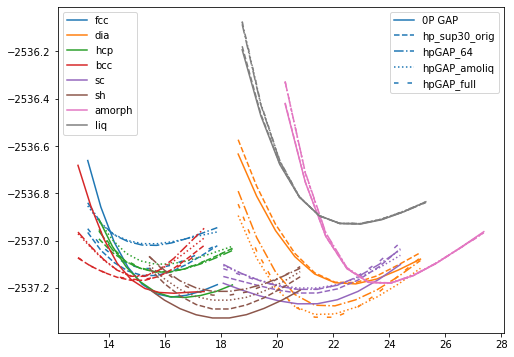

In [74]:
styl_list=['-','--','-.',':', (0, (3,6,3,6,3,10))]
df = Ge_cryst.df
fig, axs = plt.subplots(figsize=(8,6))
for i in range(len(df['Structure'])):
    if i in []:
        continue
    line, = axs.plot(df['Volumes'][i], df[df.columns[2]][i], label=df.index[i])
    if i == 0:
        hands = [line]
    for j, val in enumerate(df.columns[3:]):
        tmp, = axs.plot(df['Volumes'][i], df[val][i], linestyle=styl_list[j+1], color=line.get_color())
        if i == 0:
            hands.append(tmp)
l1 = axs.legend(loc='upper left')
axs.legend()
l2 = axs.legend(hands, df.columns[2:], loc='upper right')
axs.add_artist(l1)
fig.savefig(GE+'Analysis/Ge_EV_hp.png')

In [116]:
Ge_cryst.df

,Structure,Volumes,0P GAP,hpGAP_64,H(P) 0P GAP,H(P) hpGAP_64,P
fcc,"(Atom('Ge', [-0.04275162926463742, -0.04275162...","[13.222496393546853, 13.691891074057912, 14.17...","[-2536.7539325059975, -2536.931235329962, -253...","[-2536.8562878787648, -2536.936195442744, -253...","[-2537.282958836927, -2226.125060194121, -1954...","[-2537.021761123831, -2188.3377413387943, -186...","[0.0, 5.2631578947368425, 10.526315789473685, ..."
dia,"(Atom('Ge', [-0.5120308020550713, -0.725889258...","[18.59841504804629, 19.258653238298358, 19.934...","[-2536.4015223814677, -2536.580413278073, -253...","[-2536.794392732758, -2537.001985699009, -2537...","[-2537.282971948937, -1914.9173746403521, -137...","[-2537.021759794733, -1839.0536058254281, -119...","[0.0, 5.2631578947368425, 10.526315789473685, ..."
hcp,"(Atom('Ge', [-4.158794317495721e-12, -0.035342...","[13.622217286341717, 14.105801939395235, 14.60...","[-2536.88182178369, -2537.0032221515603, -2537...","[-2536.9557871503607, -2537.0360906032597, -25...","[-2537.265062772377, -2376.484279491959, -2235...","[-2537.1334366749275, -2355.8097490125606, -21...","[0.0, 5.2631578947368425, 10.526315789473685, ..."
bcc,"(Atom('Ge', [-0.033456966545448275, -0.0334569...","[12.874115444139898, 13.331142704794994, 13.79...","[-2536.698841132455, -2536.8681696673693, -253...","[-2536.9650345472733, -2537.0258088884334, -25...","[-2537.2906535528496, -2383.320129245847, -223...","[-2537.1545586783077, -2340.603655615431, -215...","[0.0, 5.2631578947368425, 10.526315789473685, ..."
sc,"(Atom('Ge', [5.5885388718016775e-18, -1.266409...","[18.067424766145297, 18.708812959671402, 19.36...","[-2537.18055438202, -2537.2084963738566, -2537...","[-2537.1011524866167, -2537.1388372236916, -25...","[-2537.2693638713713, -2433.60250587435, -2368...","[-2537.2083237306106, -2432.77806884152, -2346...","[0.0, 5.2631578947368425, 10.526315789473685, ..."
sh,"(Atom('Ge', [-1.6632880462166202e-18, 2.113633...","[15.415996530279086, 15.963259811789346, 16.52...","[-2537.205612727593, -2537.2519986593256, -253...","[-2537.0668737361825, -2537.1255981875242, -25...","[-2537.3292321691606, -2447.2180581394578, -23...","[-2537.216364590004, -2444.1143568840785, -235...","[0.0, 5.2631578947368425, 10.526315789473685, ..."


In [ ]:
df['H']

[(-2537.5, -2536.0), (0.0, 10.0)]

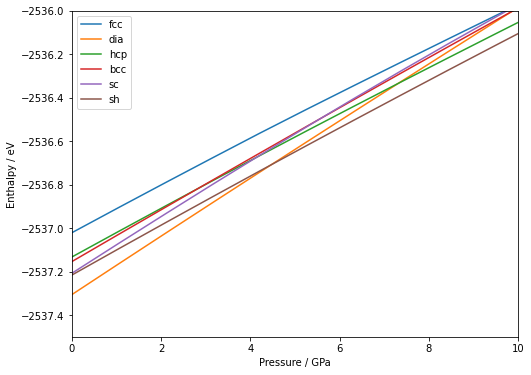

In [194]:
# enthalpy-volume curves
styl_list=['-','--','-.',':', (0, (3,6,3,6,3,10))]
df = Ge_cryst.df
fig, axs = plt.subplots(figsize=(8,6))
for i in range(len(df['Structure'])):
    if i in []:
        continue
    line, = axs.plot(df['P'][i], df[df.columns[5]][i], label=df.index[i])
    if i == 0:
        hands = [line]
    for j, val in enumerate([]):
        tmp, = axs.plot(df['P'][i], df[val][i], linestyle=styl_list[j], color=line.get_color())
        if i == 0:
            hands.append(tmp)
l1 = axs.legend(loc='upper left')
axs.legend()
l2 = axs.legend(hands, df.columns[3:], loc='upper right')
axs.add_artist(l1)
l2.remove()
axs.set(xlabel='Pressure / GPa', ylabel='Enthalpy / eV')
axs.set(xlim=(0,10), ylim=(-2537.5,-2536))


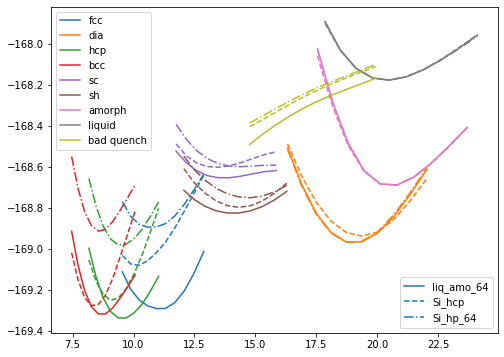

In [57]:
labels = ['fcc', 'dia', 'hcp', 'bcc', 'sc', 'sh']\
         + ['amorph', 'liquid', 'bad quench']
styl_list=['-','--','-.',':']
fig, axs = plt.subplots(figsize=(8,6))
for i in range(len(Si_V)):
    if i in []:
        continue
    line, = axs.plot(Si_V[i], Si_Es[0][i], label=labels[i])
    if i == 0:
        hands = [line]
    for j in range(len(Si_Es[1:])):
        tmp, = axs.plot(Si_V[i], Si_Es[j+1][i], linestyle=styl_list[j+1], color=line.get_color())
        if i == 0:
            hands.append(tmp)
l1 = axs.legend(loc='upper left')
l2 = axs.legend(hands, Si_pot_labels, loc='lower right')
axs.add_artist(l1)

In [38]:
Si_1000_MD = MD_run('/Users/Moji/Documents/Summer20/Ge/MD_runs/Si_liquid_gen/as5_ds002_vT/run_1000')
tmp = Si_1000_MD.structure_factors(selection=range(34,95), rings_dir=Si_1000_MD.run_dir+'/rings')
Si_1000_MD.bin_fit(nbins=200, q_selection=[1,12], s_selection=range(30,61))

In [180]:
Ge_hpliq_64_MD = MD_run(GE+'MD_runs/Ge_hp/hpliq_64/run_64001')

In [186]:
Ge_hpliq_64_MD.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1000 to 240000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Configs       240 non-null    object 
 1   CPU           240 non-null    float64
 2   Temp          240 non-null    float64
 3   f_TempAve     240 non-null    float64
 4   Press         240 non-null    float64
 5   f_PressAve    240 non-null    float64
 6   f_PEAve_Atom  240 non-null    float64
 7   Volume        240 non-null    float64
 8   f_vAve        240 non-null    float64
 9   c_MSD[4]      240 non-null    float64
dtypes: float64(9), object(1)
memory usage: 20.6+ KB


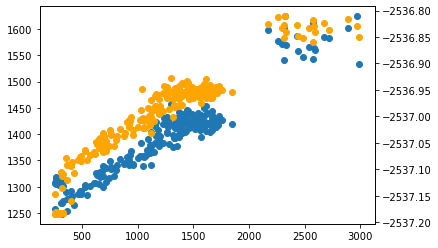

In [184]:
df = Ge_hpliq_64_MD.df
fig, axs = plt.subplots()
axs.scatter(df['Temp'], df['f_vAve'])
daxs = axs.twinx()
daxs.scatter(df['Temp'], df['f_PEAve_Atom'], color='Orange')

In [ ]:
Si_hp_MDs = [MD_run()]